In [1]:
journal_textwidths = {'prd': 6.50127,
                   'none': 8.5,
                   'kaobook':6.5, # just a guess
                   'issi':7.5 # just a guess
                   } # Latex's \textwidth in inches

def figsize(fraction_of_textwidth = 0.45,height_per_width  = 1 / 1.61803399,journal = 'prd'):
     textwidth = journal_textwidths[journal]
     width_in = textwidth * fraction_of_textwidth
     height_in = height_per_width * width_in
     return (width_in, height_in)


%matplotlib notebook

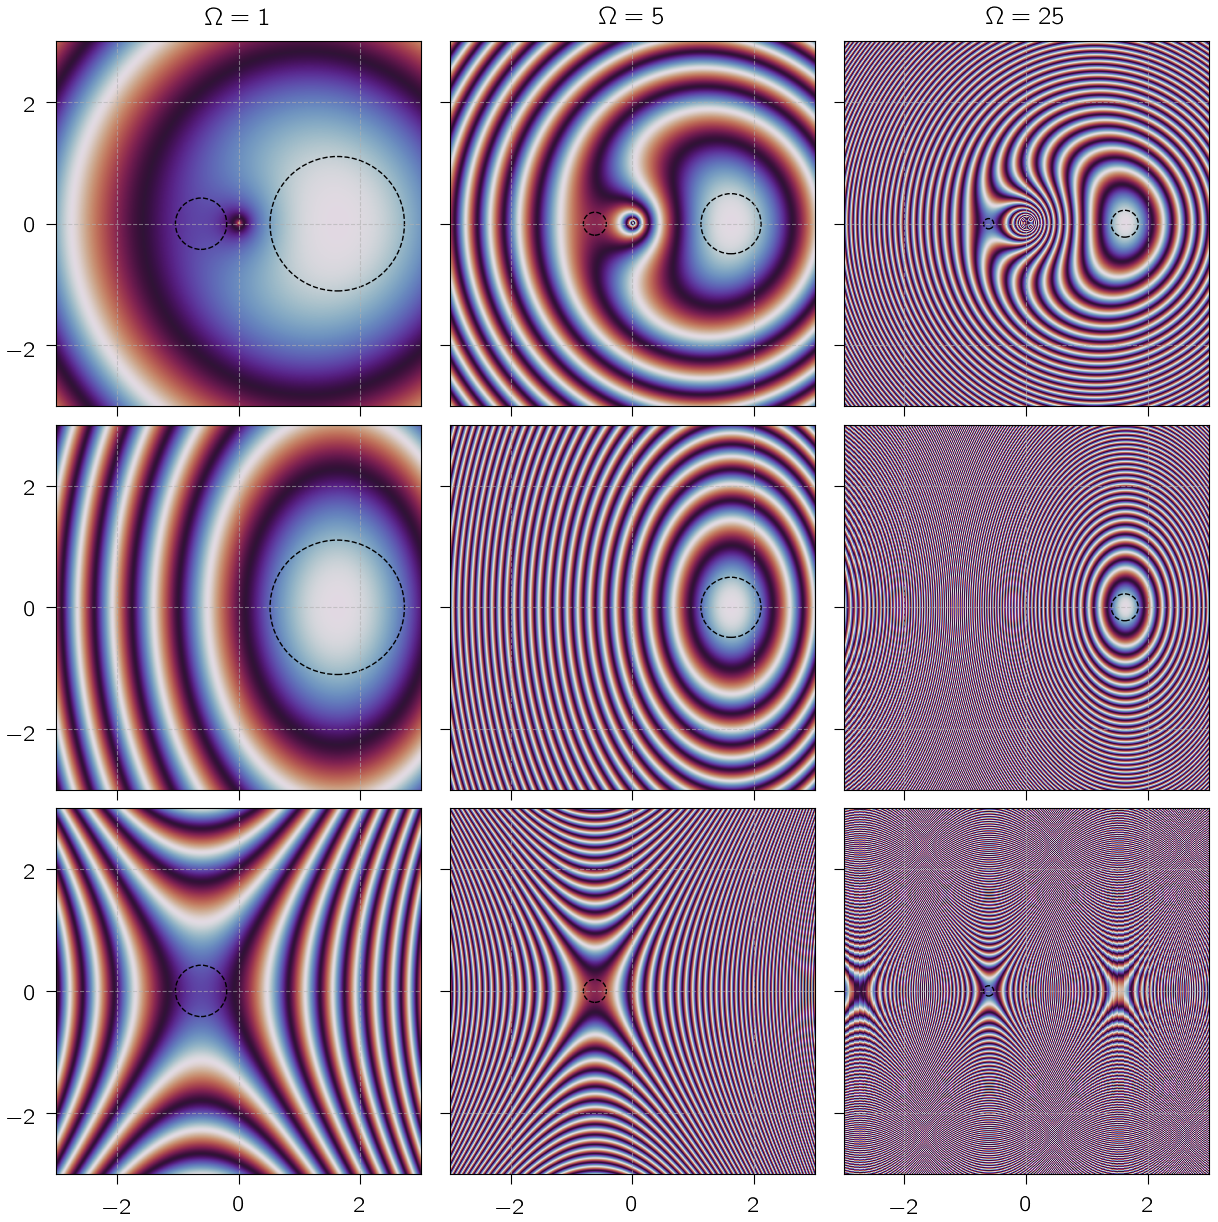

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/home/calvin/wave_optics_review/text/plot_scripts/paper_sty.mplstyle')
f,axs = plt.subplots(figsize = figsize(fraction_of_textwidth = 1, height_per_width = 1,journal = 'issi'),
             ncols = 3,nrows = 3,sharey = True)
#axs[0][0].set_title(r'$T(x,y) = \frac{1}{2}|x - y|^2$')
N = 3000
X1,X2 = np.meshgrid(np.linspace(-3,3,num = N),np.linspace(-3,3,num = N))
TH = np.angle(X1+1j*X2)
RR = (X1**2 + X2**2)**0.5
def image_pos(y1,y2):
    yv = np.array([y1,y2])
    yy = (y1**2 + y2**2)**0.5
    return 0.5 * (yv / yy) * (yy + np.sqrt(yy**2 + 4)),0.5 * (yv / yy) * (yy - np.sqrt(yy**2 + 4))
def mag(y1,y2):
    yy = (y1**2 + y2**2)**0.5
    return 0.5 + (yy**2 + 2) / (2 * yy * np.sqrt(yy**2 + 4)),0.5 - (yy**2 + 2) / (2 * yy * np.sqrt(yy**2 + 4))

def A(x1):
    """ Magnification matrix, for a lens on the x axis."""
    return np.array([[1 + 1/ x1**2, 0],[0,1 - 1/ x1**2]])

td = 0.5 * (X1 - 1)**2 + 0.5 * (X2)**2 - np.log(RR)

# also construct saddle point approx about minimums
x1p,x2p = image_pos(1,0)[0]
x1m,x2m = image_pos(1,0)[1]
mp,mm = mag(1,0) # magnification geometric optics

tplus = 0.5 * (x1p - 1)**2 + 0.5 * (0)**2 - np.log(np.abs(x1p))
tminus = 0.5 * (x1m - 1)**2 + 0.5 * (0)**2 - np.log(np.abs(x1m))
t0 = tplus

Aplus = A(x1p) # magnification matrix at plus image is diagonal
Aminus= A(np.abs(x1m)) #magnification matrix at minus image is diagonal

dX1p,dX2p = X1-x1p,X2-x2p # coordinates for plus image
dX1m,dX2m = X1-x1m,X2-x2m # coordinates for minus image

plus_saddle = tplus +   Aplus[0,0]  * dX1p**2 + Aplus[1,1]  * dX2p**2
minus_saddle = tminus + Aminus[0,0] * dX1m**2 + Aminus[1,1] * dX2m**2

for iiax, omega in zip([0,1,2,3],[1,5,25]):
#axs[0,0].imshow(omega,origin = 'lower',extent = [-3,3,-3,3],aspect = 'equal')
    axs[0,iiax].imshow(
                            omega * (td - t0) % (2*np.pi),
                origin = 'lower',extent = [-3,3,-3,3],aspect = 'equal',cmap= 'twilight'
                        )
    axs[0,iiax].scatter(x1m,x2m,s = np.abs(mm) * 2000 / omega,facecolors='none',edgecolors = 'k',linestyle = '--')
    axs[0,iiax].scatter(x1p,x2p,s = np.abs(mp) * 2000 / omega,facecolors='none',edgecolors='k',linestyle = '--')
    axs[0,iiax].set_xlim(-3,3)
    axs[0,iiax].set_ylim(-3,3)
    axs[0,iiax].set_xticks([-2,0,2])
    axs[0,iiax].set_title(fr'$\Omega = {omega}$')
    axs[1,iiax].imshow(
                            omega * (plus_saddle - t0) % (2*np.pi),
                    origin = 'lower',extent = [-3,3,-3,3],aspect = 'equal',cmap= 'twilight',rasterized=True
    )
    axs[1,iiax].scatter(x1p,x2p,s = np.abs(mp) * 2000 / omega,facecolors='none',edgecolors='k',linestyle = '--')
    axs[1,iiax].set_xlim(-3,3)
    axs[1,iiax].set_ylim(-3,3)
    axs[1,iiax].set_xticks([-2,0,2])
    
    axs[2,iiax].imshow(
                            omega * (minus_saddle - t0) % (2*np.pi),
                    origin = 'lower',extent = [-3,3,-3,3],aspect = 'equal',cmap= 'twilight',rasterized=True
    )
    axs[2,iiax].scatter(x1m,x2m,s = np.abs(mm) * 2000 / omega,facecolors='none',edgecolors = 'k',linestyle = '--')
    axs[2,iiax].set_xlim(-3,3)
    axs[2,iiax].set_ylim(-3,3)
    axs[2,iiax].set_xticks([-2,0,2])
#plt.suptitle(r'$\Omega T(x,y) = \Omega[\frac{1}{2}|x - y_0|^2 - \log(|x|)]$',y = 0.95)

plt.subplots_adjust(hspace = 0.05,wspace = 0.05)
axs[0,0].set_yticks([-2,0,2])
axs[1,0].set_yticks([-2,0,2])

plt.savefig('/home/calvin/wave_optics_review/text/figs/fresnel.pdf',dpi = 279)

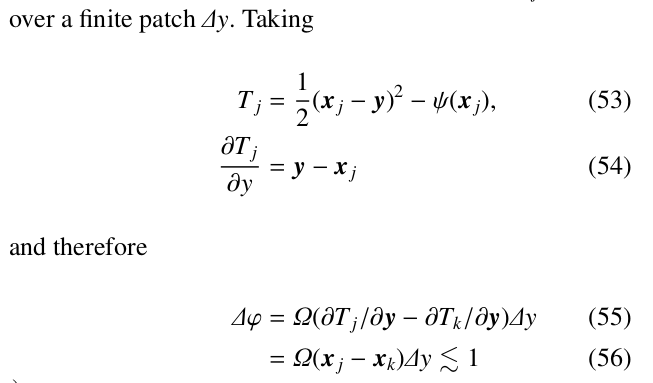

In [8]:
A(0.1)

array([[101.,   0.],
       [  0., -99.]])

In [9]:
x1p

1.618033988749895

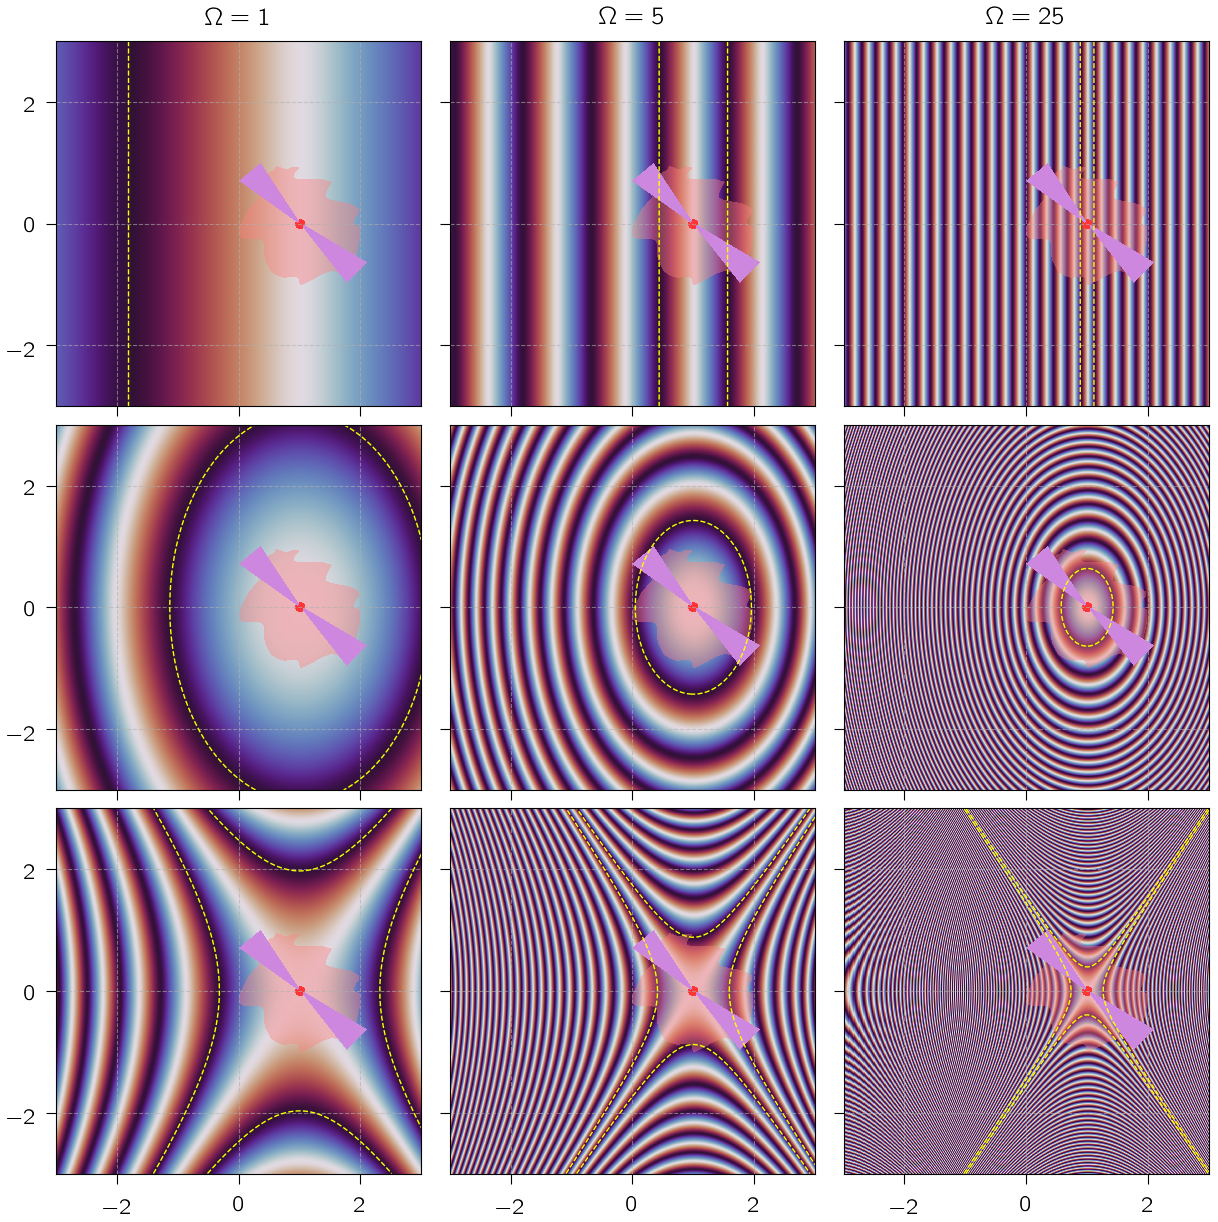

In [11]:
plt.style.use('/home/calvin/wave_optics_review/text/plot_scripts/paper_sty.mplstyle')
source = plt.imread('/home/calvin/wave_optics_review/text/figs/source.png')

f,axs = plt.subplots(figsize = figsize(fraction_of_textwidth = 1, height_per_width = 1,journal = 'issi'),
             ncols = 3,nrows = 3,sharey = True)

# this time, fix the image positions:
x1p,x2p = image_pos(1,0)[0]
x1m,x2m = image_pos(1,0)[1]


tplus = 0.5 * (x1p - 1)**2 + 0.5 * (x2p - 0)**2# - np.log(np.sqrt(x1p**2 + x2p**2))
tminus = 0.5 * (x1m - 1)**2 + 0.5 * (x2m - 0)**2# - np.log(np.sqrt(x1m**2 + x2m**2))
t0 = tplus - tminus

N = 3000
Y1,Y2 = np.meshgrid(np.linspace(-3,3,num = N),np.linspace(-3,3,num = N))

tdpm = 0.5 * (x1p - x1m) * (Y1-1) #  delta T = (xj - xk) dot (\overline y); y = (1,0)
tdp2 = 0.5 * A(x1p)[0,0] * (Y1-1)**2 + 0.5 * A(x1p)[1,1] * (Y2-0)**2# - np.log(np.sqrt(x1p**2 + x2p**2))
tdm2 = 0.5 * A(x1m)[0,0] * (Y1-1)**2 + 0.5 * A(x1m)[1,1] * (Y2-0)**2# - np.log(np.sqrt(x1p**2 + x2p**2))

def source_extent(y1):
    return [-1 + y1,1.1 + y1,-1,1]
tdd = 0.5 * Y1**2 + 0.5 * Y2**2
for iiax, omega in zip([0,1,2,3],[1,5,25]):
    
    #axs[1,iiax].scatter([1],[0],marker = 'x')
    axs[0,iiax].imshow(omega * tdpm % (2*np.pi),
          origin = 'lower',extent = [-3,3,-3,3],aspect = 'equal',cmap= 'twilight'
                 )
    axs[0,iiax].contour(Y1,Y2,omega * tdpm,levels = [-np.pi,np.pi],linestyles = 'dashed',colors = 'yellow')
    
    axs[1,iiax].imshow(omega * tdp2 % (2*np.pi),
          origin = 'lower',extent = [-3,3,-3,3],aspect = 'equal',cmap= 'twilight'
                 )
    axs[1,iiax].contour(Y1,Y2,omega * tdp2,levels = [-np.pi,np.pi],linestyles = 'dashed',colors = 'yellow')
    axs[2,iiax].imshow(omega * tdm2 % (2*np.pi),
          origin = 'lower',extent = [-3,3,-3,3],aspect = 'equal',cmap= 'twilight'
                 )
    axs[2,iiax].contour(Y1,Y2,omega * tdm2,levels = [-np.pi,np.pi],linestyles = 'dashed',colors = 'yellow')

    axs[0,iiax].imshow(source,extent = source_extent(y1 = 1),aspect = 'equal')
    axs[0,iiax].set_xlim(-3,3);axs[0,iiax].set_ylim(-3,3)
    axs[1,iiax].imshow(source,extent = source_extent(y1 = 1),aspect = 'equal')
    axs[1,iiax].set_xlim(-3,3);axs[0,iiax].set_ylim(-3,3)
    axs[2,iiax].imshow(source,extent = source_extent(y1 = 1),aspect = 'equal')
    axs[2,iiax].set_xlim(-3,3);axs[0,iiax].set_ylim(-3,3)
    
    axs[0,iiax].set_title(fr'$\Omega = {omega}$')
    axs[0,iiax].set_xticks([-2,0,2])
    axs[1,iiax].set_xticks([-2,0,2])
    axs[2,iiax].set_xticks([-2,0,2])
plt.subplots_adjust(hspace = 0.05,wspace = 0.05)
axs[0,0].set_yticks([-2,0,2])
axs[1,0].set_yticks([-2,0,2])

plt.savefig('/home/calvin/wave_optics_review/text/figs/fresnel_source_plane.pdf',dpi = 150)

In [ ]:
dT/dy = (y - x)
dT/dx = (x - y) + \nabla phi

For a point mass

dT/dx = (x - y) + 1 / x

For SIS
dT/dx = (x - y) + sign(x)

